# Data Visualization Notebook

### Import Required Libraries and Packages

In [1]:
# -----------------------------
# 📦 Imports
# -----------------------------
import random
import torch
import numpy as np
import matplotlib.pyplot as plt

from datasets.data_loader import create_dataloader

### Visualize Patches from Dataset

In [5]:
# -----------------------------
# 🔍 Triplet Patch Visualization Function
# -----------------------------
def visualize_triplet_patches(npz_file, num_samples=5):
    """
    Display N triplets (anchor, positive, negative) from a triplet .npz dataset.

    Args:
        npz_file (str): Path to .npz file with 'triplets'.
        num_samples (int): Number of triplets to display.
    """
    data = np.load(npz_file)
    triplets = data['triplets']  # shape: (N, 40, 40, 3)

    # Randomly sample triplet indices
    indices = np.random.choice(triplets.shape[0], num_samples, replace=False)

    # Create a grid: 3 rows (anchor, positive, negative), num_samples columns
    fig, axes = plt.subplots(3, num_samples, figsize=(num_samples * 2, 6))
    fig.suptitle("Triplet Patches (Anchor - Positive - Negative)", fontsize=16)

    for col, idx in enumerate(indices):
        triplet = triplets[idx]
        anchor = triplet[:, :, 0]
        positive = triplet[:, :, 1]
        negative = triplet[:, :, 2]

        titles = ["Anchor", "Positive", "Negative"]
        images = [anchor, positive, negative]

        for row in range(3):
            ax = axes[row, col]
            ax.imshow(images[row], cmap='gray')
            ax.set_title(titles[row], fontsize=9)
            ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)  # Room for suptitle
    plt.show()

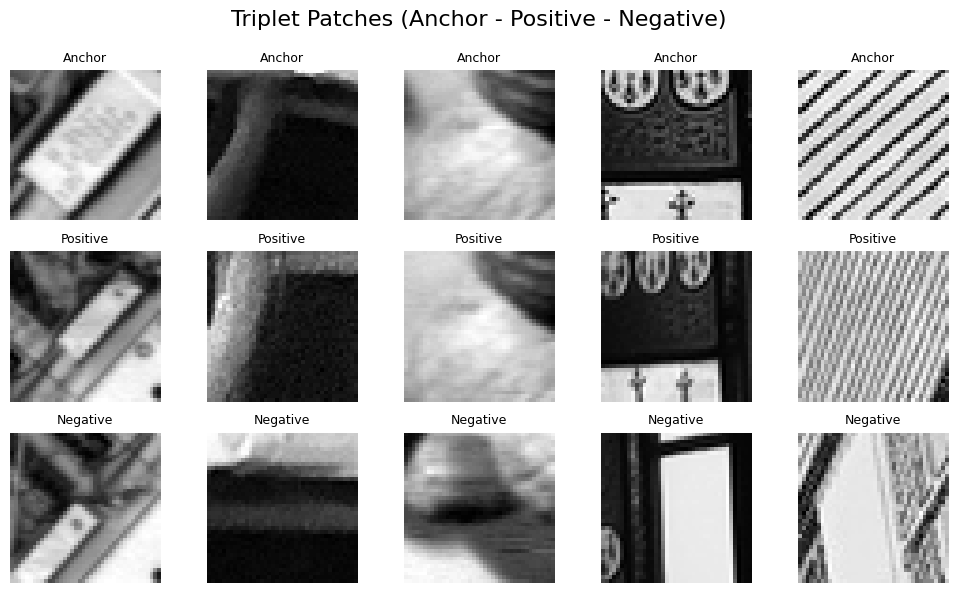

In [6]:
# -----------------------------
# ▶️ Call the function
# -----------------------------
# Example: change path if needed
visualize_triplet_patches("../data/dataset/train_dataset.npz", num_samples=5)

### Visualize Patches from Dataset with Augmentation

In [7]:
def visualize_augmented_patches(npz_file, batch_size=4, num_batches=1):
    """
    Visualize augmented triplets sampled from the DataLoader.

    Args:
        npz_file (str): Path to .npz file used for DataLoader.
        batch_size (int): Batch size to visualize.
        num_batches (int): Number of batches to visualize.
    """
    dataloader = create_dataloader(npz_file, batch_size=batch_size, shuffle=True)

    for batch_idx, (anchors, positives, negatives) in enumerate(dataloader):
        if batch_idx >= num_batches:
            break

        anchors = anchors.squeeze(1).numpy()  # (B, H, W)
        positives = positives.squeeze(1).numpy()
        negatives = negatives.squeeze(1).numpy()

        fig, axes = plt.subplots(3, batch_size, figsize=(batch_size * 2, 6))
        fig.suptitle(f"Augmented Patches (Batch {batch_idx + 1})", fontsize=16)

        for col in range(batch_size):
            titles = ["Anchor", "Positive", "Negative"]
            images = [anchors[col], positives[col], negatives[col]]

            for row in range(3):
                ax = axes[row, col]
                ax.imshow(images[row], cmap='gray')
                ax.set_title(titles[row], fontsize=9)
                ax.axis('off')

        plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.show()

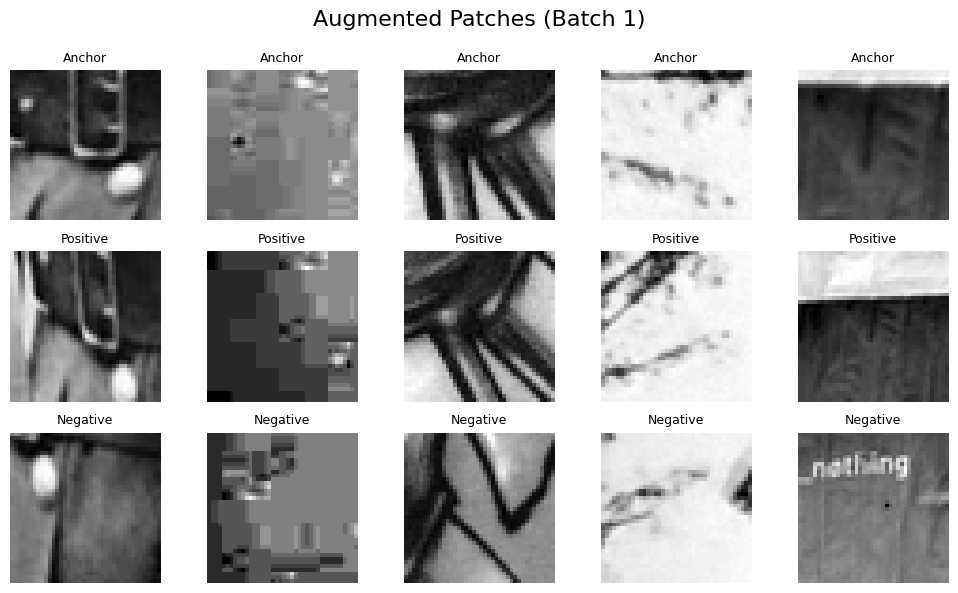

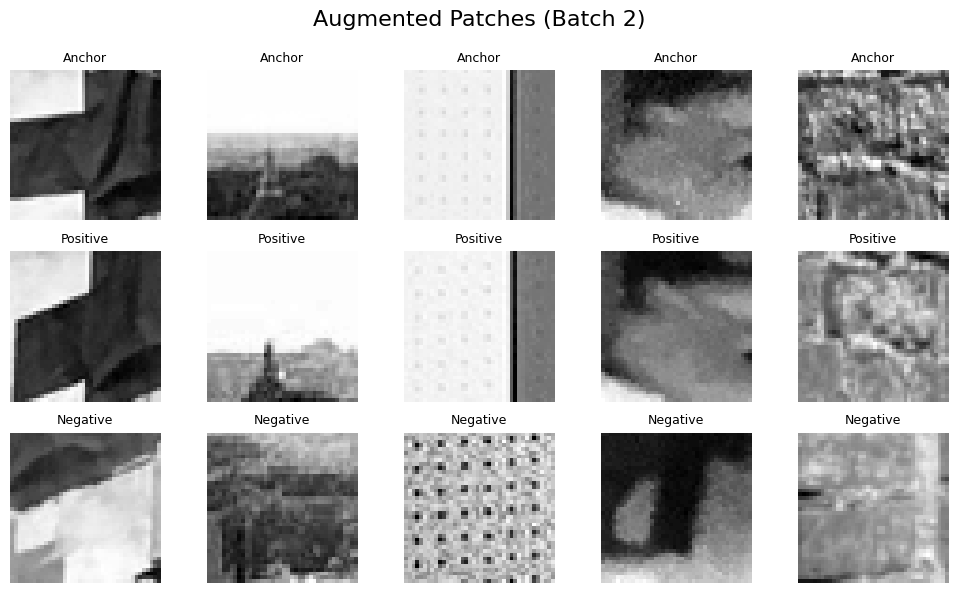

In [8]:
visualize_augmented_patches("../data/dataset/train_dataset.npz", batch_size=5, num_batches=2)

In [7]:
def visualize_three_triplet_patches(npz_file, save_path=None):
    """
    Display 3 triplet samples (Anchor, Positive, Negative) in a single figure
    with each row showing one triplet.

    Args:
        npz_file (str): Path to .npz file with 'triplets'.
        save_path (str): If provided, saves the figure to this path.
    """
    data = np.load(npz_file)
    triplets = data['triplets']  # shape: (N, 40, 40, 3)
    num_samples = 4

    indices = np.random.choice(triplets.shape[0], num_samples, replace=False)

    fig, axes = plt.subplots(num_samples, 3, figsize=(6, 6))
    fig.suptitle("Anchor - Positive - Negative Triplets", fontsize=14)

    for row, idx in enumerate(indices):
        triplet = triplets[idx]
        anchor = triplet[:, :, 0]
        positive = triplet[:, :, 1]
        negative = triplet[:, :, 2]

        patches = [anchor, positive, negative]
        labels = ['Anchor', 'Positive', 'Negative']

        for col in range(3):
            ax = axes[row, col]
            ax.imshow(patches[col], cmap='gray')
            if row == 0:
                ax.set_title(labels[col], fontsize=10)
            ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"[INFO] Saved figure to {save_path}")
    else:
        plt.show()

[INFO] Saved figure to triplet_samples.png


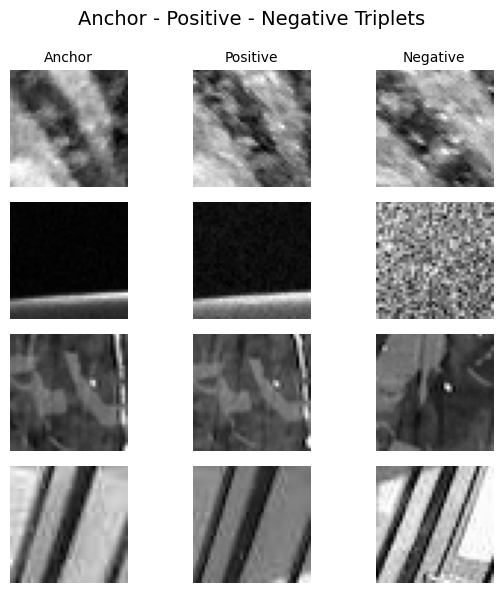

In [8]:
visualize_three_triplet_patches('../data/dataset/train_dataset.npz', save_path='triplet_samples.png')